# BANK MARKETING Predicting

# About Project
### Business Use Case
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

### Project Description
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.
About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 



### You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.
 
### Dataset Attributes
Here is the description of all the variables:
1. Variable: Definition
2. ID: Unique client ID
3. age: Age of the client
4. job: Type of job
5. marital: Marital status of the client
6. education: Education level
7. default: Credit in default.
8. housing: Housing loan
9. loan: Personal loan
10. contact: Type of communication
11. month: Contact month
12. day_of_week: Day of week of contact
13. duration: Contact duration
14. campaign: number of contacts performed during this campaign to the client
15. pdays: number of days that passed by after the client was last contacted
16. previous: number of contacts performed before this campaign
17. poutcome: outcome of the previous marketing campaign
### Output variable (desired target):
1. Subscribed (target): has the client subscribed a term deposit? (YES/NO)



### Dataset Link-
* https://github.com/FlipRoboTechnologies/ML-Datasets/tree/main/Bank%20Marketing
* https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Bank%20Marketing/termdeposit_test.csv
* https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv


In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Dataset 
df_train = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv")

In [3]:
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
df_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [5]:
# Checking the columns of each dataset
df_train.columns.tolist()

['ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'subscribed']

In [6]:
df_test.columns.tolist()

['ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

Here 'Subscribed' is the target variable.

In [7]:
# Checking the data type of variable 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [9]:
# Checking the shapes of each dataset
df_train.shape

(31647, 18)

In [10]:
df_test.shape

(13564, 17)

Hence, we can see that we have 17 similar features in the both the dataset and 'Subscribed' is the variable that is to be predicted

# Data Exploration

In [11]:
# explore the data set of train data
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [12]:
# explore the data set of test data 
df_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [13]:
# checking for missing values in train dataset
df_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [14]:
df_test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

# Exploratory Data Analysis

### Analysis of 'Subscribed' Variable

In [15]:
# Frequency of subscribed 
df_train['subscribed'].value_counts()

subscribed
no     27932
yes     3715
Name: count, dtype: int64

<Axes: xlabel='subscribed', ylabel='count'>

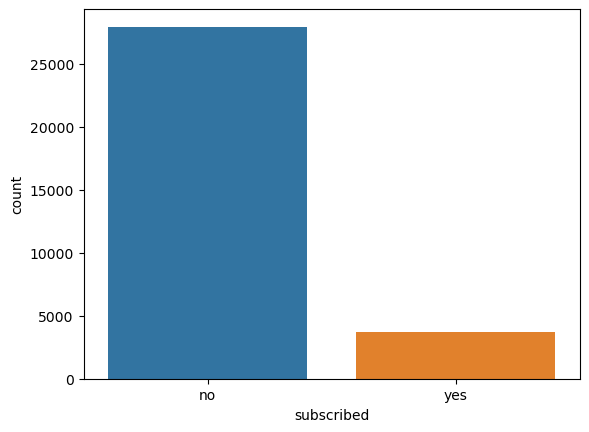

In [16]:
# Ploting the 'subscribed' frequency
sns.countplot(data=df_train, x='subscribed')

In [17]:
#Normalizing the frequency table of 'Subscribed' variable
df_train['subscribed'].value_counts(normalize=True)

subscribed
no     0.882611
yes    0.117389
Name: proportion, dtype: float64

From the above analysis we can see that only 3,715 people out of 31,647 have subscribed which is roughly 12%.

### Analysing the 'JOB' variable

In [18]:
# Frequency table
df_train['job'].value_counts()

job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64

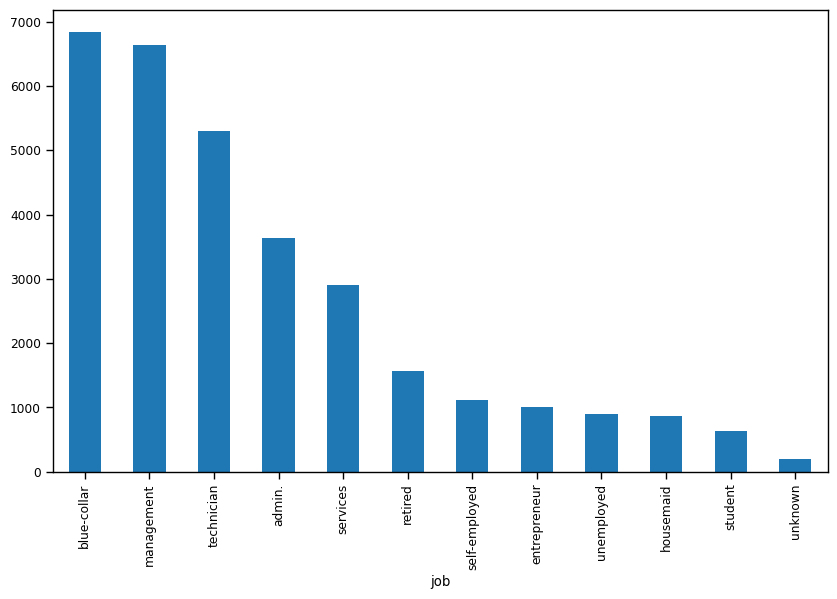

In [19]:
# Plotting the job frequency table
sns.set_context('paper')
df_train['job'].value_counts().plot(kind='bar', figsize=(10,6));

### Analysis of "Marital Status"

In [20]:
# Frequency of Marital status
df_train['marital'].value_counts()

marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64

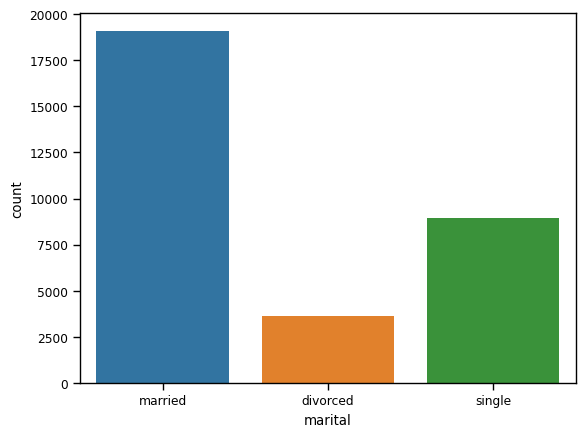

In [21]:
sns.countplot(data=df_train, x='marital');

<Axes: xlabel='marital', ylabel='count'>

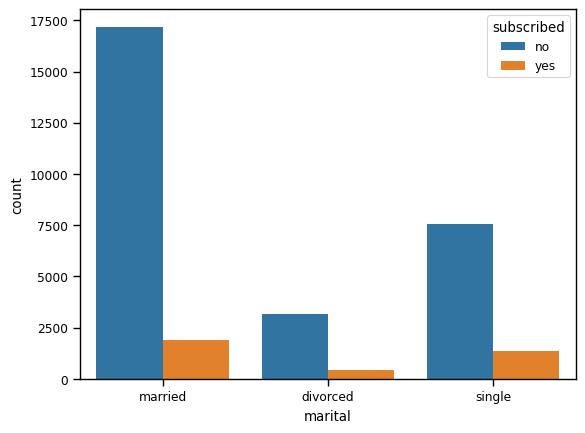

In [22]:
sns.countplot(data=df_train, x='marital', hue='subscribed')

### Analysis the "Age" variable

<Axes: xlabel='age', ylabel='Density'>

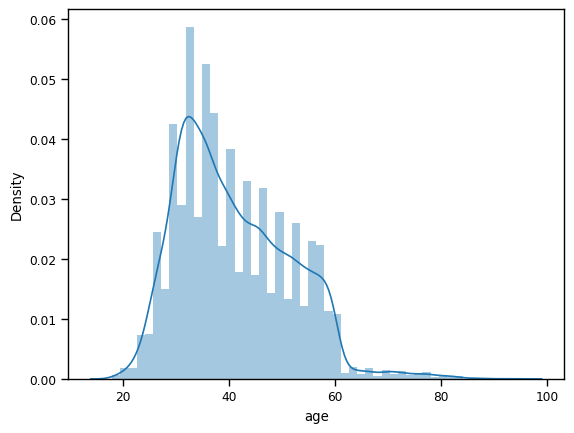

In [23]:
sns.distplot(df_train['age'])

As per Data infer most of clints fall in the age group between 20 to 60.

# Job VS Subscribed Analysis

In [26]:
print(pd.crosstab(df_train['job'],df_train['subscribed']))

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


In [28]:
job = pd.crosstab(df_train['job'],df_train['subscribed'])
job_norm = job.div(job.sum(1).astype(float), axis=0)

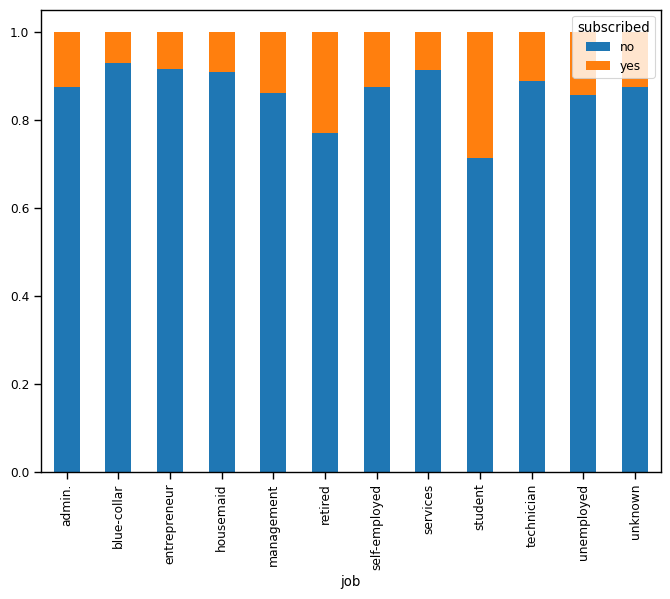

In [29]:
job_norm.plot.bar(stacked=True,figsize=(8,6));

From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

In [31]:
# Marital status VS subscribed
pd.crosstab(df_train['marital'], df_train['subscribed'])

subscribed,no,yes
marital,,
divorced,3185,445
married,17176,1919
single,7571,1351


In [33]:
marital = pd.crosstab(df_train['marital'],df_train['subscribed'])
marital_norm = marital.div(marital.sub(1).astype(float), axis=0)
marital_norm

subscribed,no,yes
marital,,
divorced,1.000314,1.002252
married,1.000058,1.000521
single,1.000132,1.000741


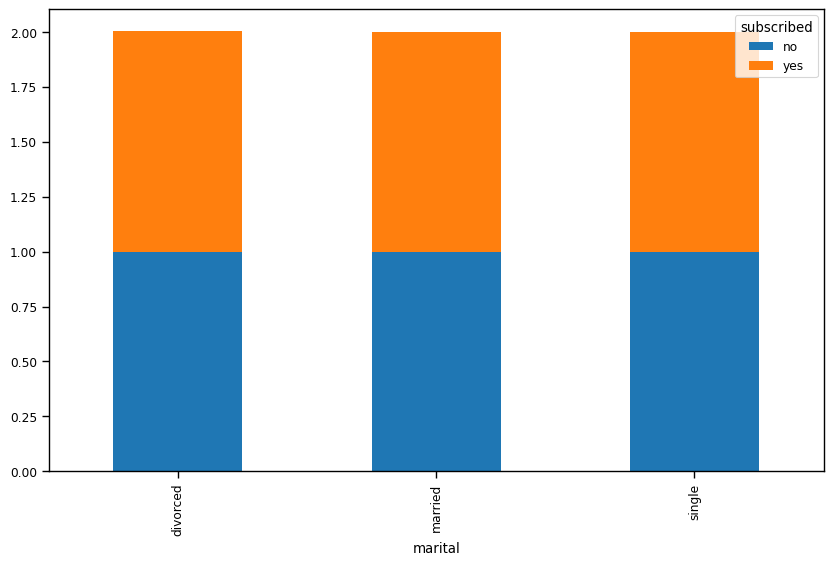

In [34]:
marital_norm.plot.bar(stacked=True, figsize=(10,6));

From the above analysis we can infer that marital status doesn't have a major impact on the subscription to term deposits.

In [35]:
# Default VS Subscription
pd.crosstab(df_train['default'], df_train['subscribed'])

subscribed,no,yes
default,,
no,27388,3674
yes,544,41


In [36]:
dflt = pd.crosstab(df_train['default'],df_train['subscribed'])
dflt_norm = dflt.div(dflt.sum(1).astype(float), axis=0)
dflt_norm

subscribed,no,yes
default,,
no,0.881720,0.118280
yes,0.929915,0.070085


<Axes: xlabel='default'>

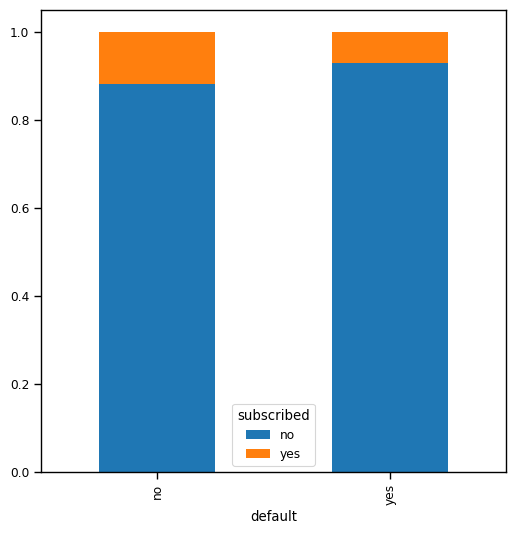

In [37]:
dflt_norm.plot.bar(stacked=True,figsize=(6,6))

We can infer that clients having no previous default have slightly higher chances of subscribing to a term deposit as compared to the clients who have previous default history.

In [38]:
# Converting target variables into 0s and 1s
df_train['subscribed'].replace('no', 0,inplace=True)
df_train['subscribed'].replace('yes', 1,inplace=True)

In [39]:
df_train['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

In [44]:
# lets find corelation maatrix
df_numeric = df_train.select_dtypes(include=[float, int])
tc = df_numeric.corr()
tc

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


<Axes: >

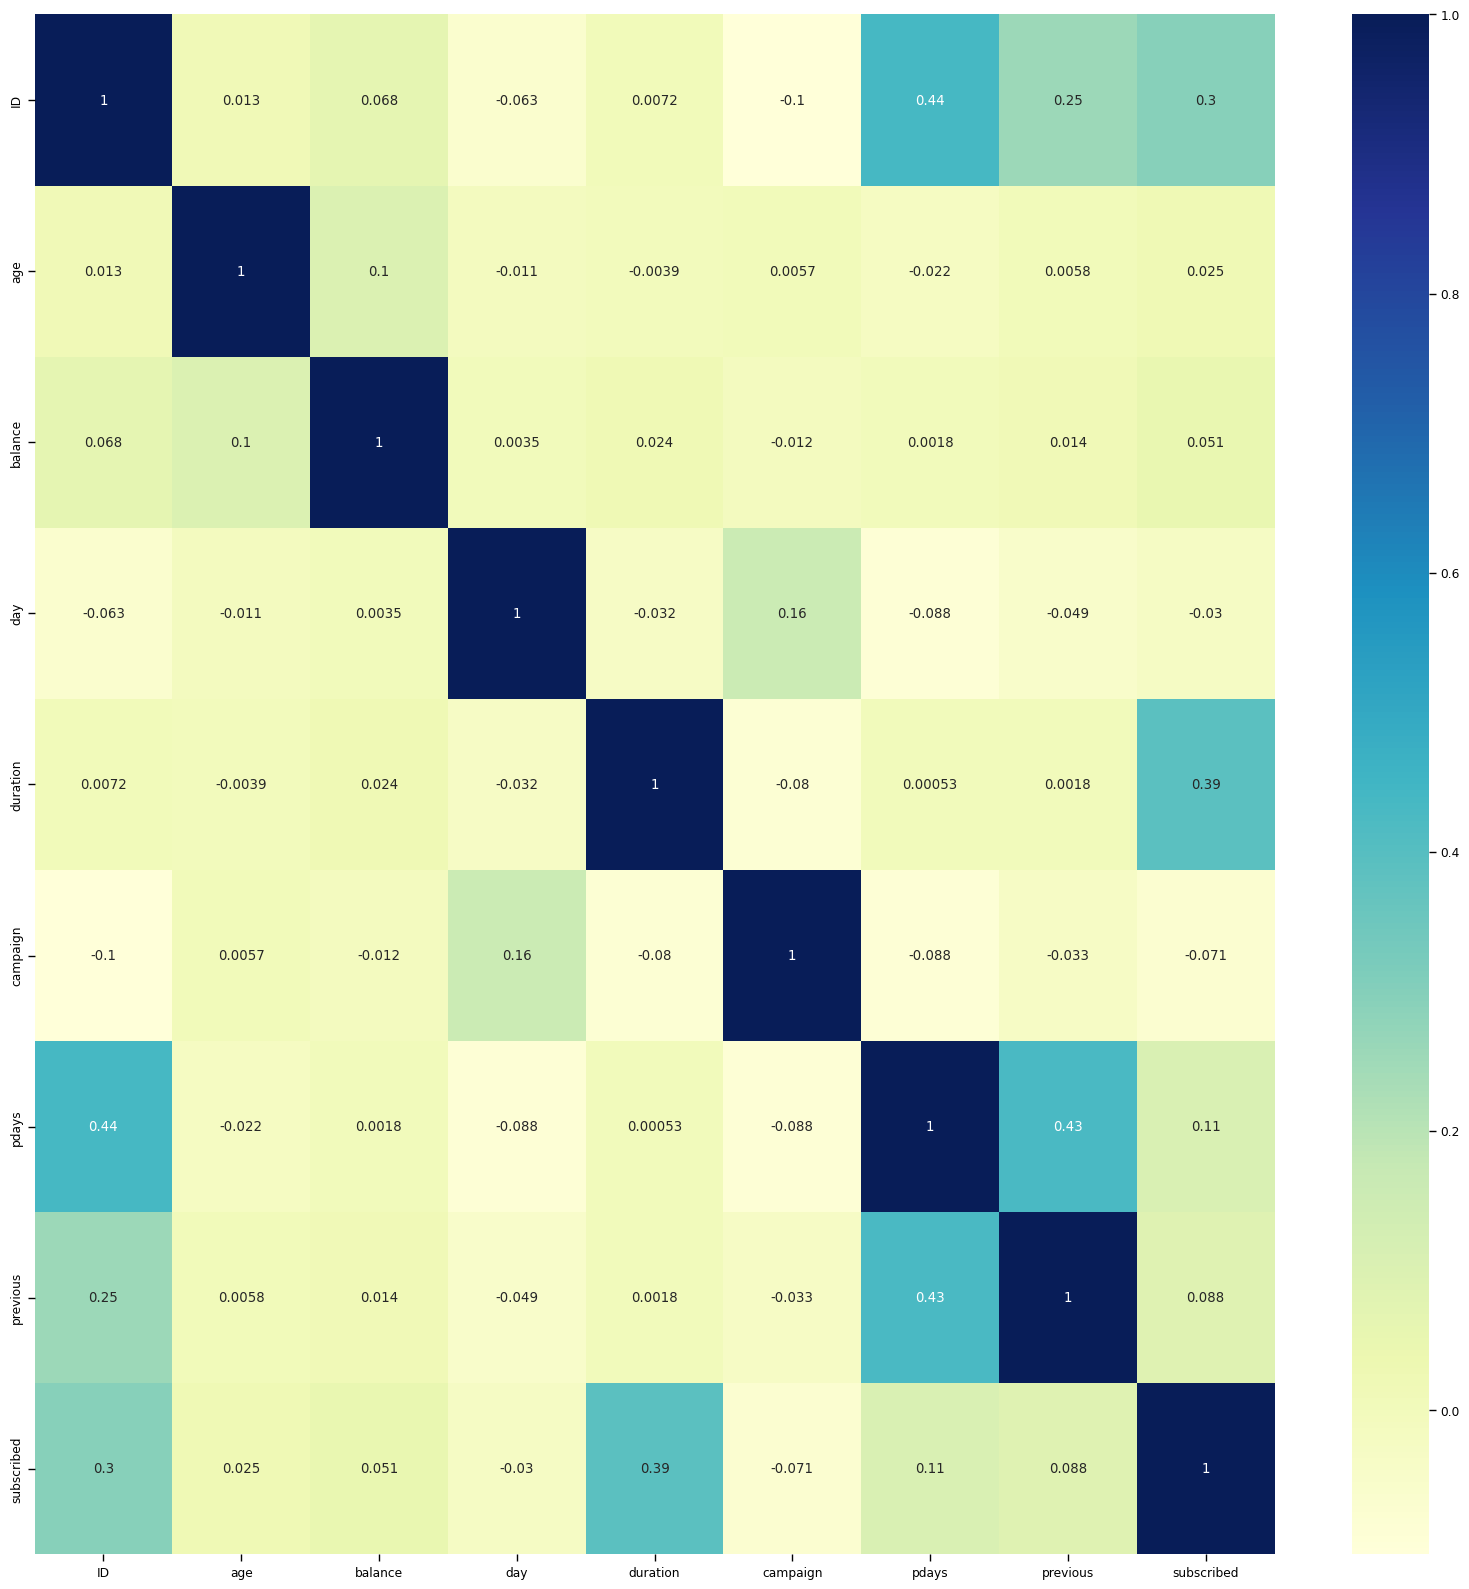

In [45]:
fig,ax = plt.subplots()
fig.set_size_inches(20,20)
sns.heatmap(tc, annot=True, cmap='YlGnBu')

We can infer that duration of the call is highly correlated with the target variable. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

# Model Building

In [46]:
target = df_train['subscribed']
df_train = df_train.drop('subscribed', axis=1)

In [47]:
# Generating Dummy values on the train dataset
df_train = pd.get_dummies(df_train)
df_train.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,True,False,...,False,False,False,True,False,False,False,False,False,True
1,40576,31,3,20,91,2,-1,0,False,False,...,False,False,False,False,False,False,False,False,False,True
2,15320,27,891,18,240,1,-1,0,False,False,...,False,False,False,False,False,False,False,False,False,True
3,43962,57,3287,22,867,1,84,3,False,False,...,True,False,False,False,False,False,False,False,True,False
4,29842,31,119,4,380,1,-1,0,False,False,...,False,False,False,False,False,False,False,False,False,True


Splitting the data into train and validation set such as to validate the results of our model on the validation set. keeping 20% of the dataset as our validation set and the rest as our training set.

In [48]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_val, y_train, y_val = train_test_split(df_train, target, test_size=0.2, random_state=12)

Now our data is ready and it's time to build our model and check its performance. Since it's a classification problem, I'll be using Logistic Regression model for this problem.

# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
#creating an object of logistic regression model
lreg = LogisticRegression()

In [54]:
#fitting the data into the model
lreg.fit(X_train,y_train)

LogisticRegression()

In [55]:
#Making predictions on the validation set
pred = lreg.predict(X_val)

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
#Calculating the accuracy score
accuracy_score(y_val,pred)

0.8868878357030016

We got an accuracy score of around 89% on the validation dataset. Logistic regression has a linear decision boundary. What if our data have non linearity? We need a model that can capture this non linearity.

### Using Decision Tree algorithm to for dealing with non-linearity

# Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
#creating an object of Decision tree
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [61]:
#fitting the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [62]:
#making predictions on the validation set
predict = clf.predict(X_val)
predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [63]:
#Calculating the accuracy
accuracy_score(y_val,predict)

0.9042654028436019

We got an accuracy of more than 90% on the validation set.

### Let's now make the prediction on test dataset

In [65]:
df_test = pd.get_dummies(df_test)
df_test.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,False,False,...,False,False,True,False,False,False,False,False,False,True
1,40403,78,2787,1,372,1,-1,0,False,False,...,False,False,False,False,False,False,False,False,False,True
2,3709,31,144,16,676,1,-1,0,False,False,...,False,False,True,False,False,False,False,False,False,True
3,37422,57,3777,13,65,2,-1,0,False,False,...,False,False,True,False,False,False,False,False,False,True
4,12527,45,-705,3,111,1,-1,0,False,True,...,False,False,False,False,False,False,False,False,False,True


In [66]:
test_pred = clf.predict(df_test)
test_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

Finally, we will save these predictions into a csv file.

In [67]:
submissions = pd.DataFrame()

In [69]:
submissions['ID'] = df_test['ID']
submissions['subscribed'] = test_pred

In [70]:
submissions['subscribed']

0        0
1        1
2        0
3        0
4        0
        ..
13559    0
13560    0
13561    0
13562    1
13563    0
Name: subscribed, Length: 13564, dtype: int64

Since the target variable is yes or no, we will convert 1 and 0 in the predictions to yes and no respectively.

In [71]:
submissions['subscribed'].replace(0,'no',inplace=True)
submissions['subscribed'].replace(1,'yes',inplace=True)

In [72]:
submissions['subscribed']

0         no
1        yes
2         no
3         no
4         no
        ... 
13559     no
13560     no
13561     no
13562    yes
13563     no
Name: subscribed, Length: 13564, dtype: object